In [1]:
from IPython import get_ipython

import numpy as np
from numpy import random, dtype
from array import array
import math
from math import floor

import matplotlib
# matplotlib.use('agg')
import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib widget
# %matplotlib widget

from os import path, mkdir
from tqdm import tqdm

import ROOT
from ROOT import TCanvas, TFile, TPaveText, TMath, TF1, TH1, TH1F, TH2D, TH2F, TH3F, TRandom, TPolyMarker3D, TGraphErrors, TBox
from ROOT import gROOT, gBenchmark, gRandom, gInterpreter, gPad, gStyle, gDirectory
from ROOT import nullptr, kBlue, kRed

# import rootpy
# %jsroot on

Welcome to JupyROOT 6.24/06


In [2]:
ROOT.gROOT.LoadMacro('./includes/rootlogon.C')

0


 Beginning new ROOT session with private TStyle 


In [3]:
canvasCnt = 0
canvases = []

def NewCanvas(s1 = 800, s2 = 500):
    
    global canvasCnt, canvases
    n = "" + str(canvasCnt)
    canvases.append(TCanvas(n, n, s1, s2))
    canvases[canvasCnt].Draw()
    canvasCnt = canvasCnt+1
    return canvasCnt-1, canvases[canvasCnt-1]

In [4]:
def FillGraph(gra: TGraphErrors, x, y, ex, ey):
    gra.AddPoint(x, y)
    n = gra.GetN()
    gra.SetPointError(n-1, ex, ey)
    return n

In [5]:
run = "run530164"
out = F"out/{run}/"
exten = ".pdf"
fin = TFile(F"../data/roottople_new/{run}_new.root")
tre = fin.Get("t")

try:
    mkdir(out)
except:
    pass

mtMcp = "0.5*(tim[2]+tim[3])"
dtMcp = "tim[2]-tim[3]"
mtSipm = "0.5*(tim[1]+tim[0])"
dtSipm = "tim[1]-tim[0]"
mcSipm = "0.5*(charge[1]+charge[0])"
asymSipm = "(charge[1]-charge[0])/(charge[1]+charge[0])"
cutAnd = " && "

fidlarge = np.array([5.7, 6.7, 4.7, 5.6])
fidlarge = [5.7, 6.7, 4.7, 5.6] if run == "run530164" else fidlarge
fidlarge = [5.9, 7.0, 4.7, 5.6] if run == "run530167" else fidlarge 
fidlarge = [5.9, 7.0, 4.5, 5.5] if run == "run530181" else fidlarge
fidlarge = [5.9, 7.0, 4.5, 5.5] if run == "run530178" else fidlarge
fidLarge = F"cryPos[0]>{fidlarge[0]} && cryPos[0]<{fidlarge[1]} && cryPos[1]>{fidlarge[2]} && cryPos[1]<{fidlarge[3]}" 

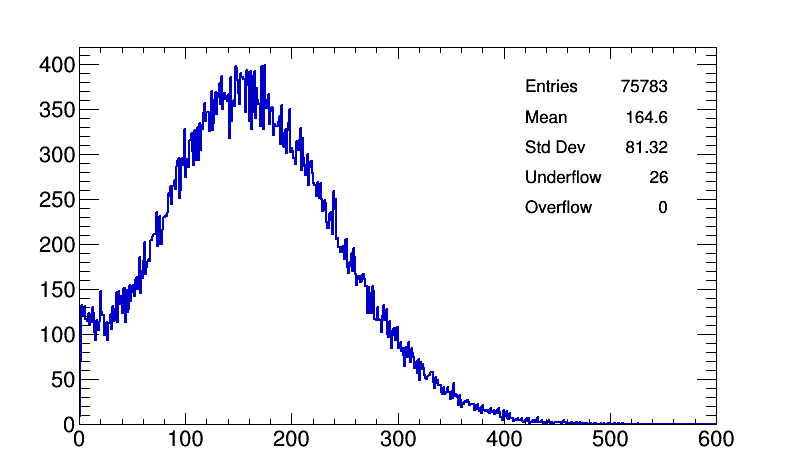

In [6]:
NewCanvas()
tre.Draw("charge[0]>>(600, 0, 600)", fidLarge)
cCutSipm = "charge[0] > 50 && charge[1] > 50"

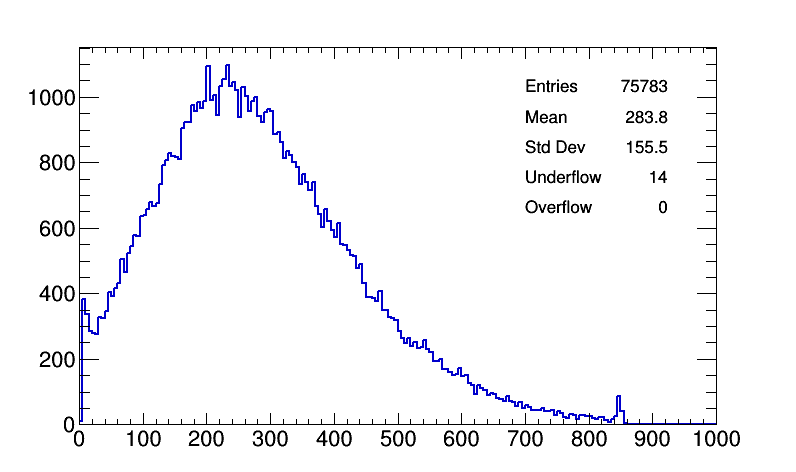

In [7]:
NewCanvas()
tre.Draw("peak[2]>>(200, 0, 1000)", fidLarge)
cCutMcp = "peak[2]>100 && peak[3]>100"

67316

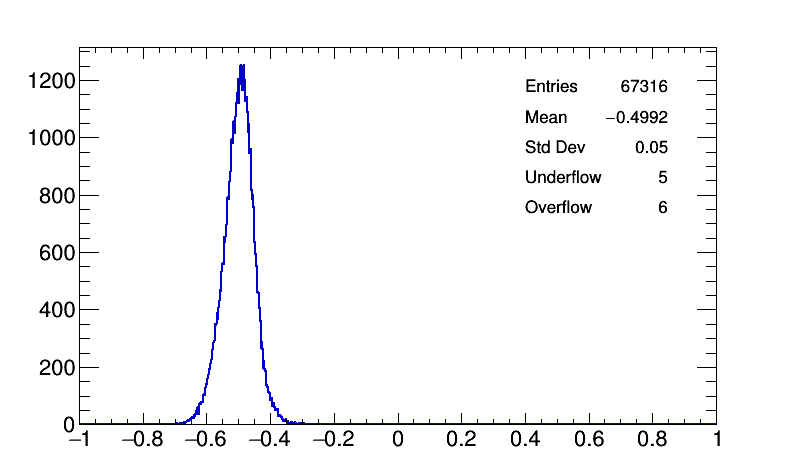

In [8]:
NewCanvas()
tre.Draw(F"{dtMcp}>>(1000, -1, 1)", F"{cCutMcp} && {fidLarge}")

Info in <TCanvas::Print>: pdf file out/run530164/q1_q2.pdf has been created


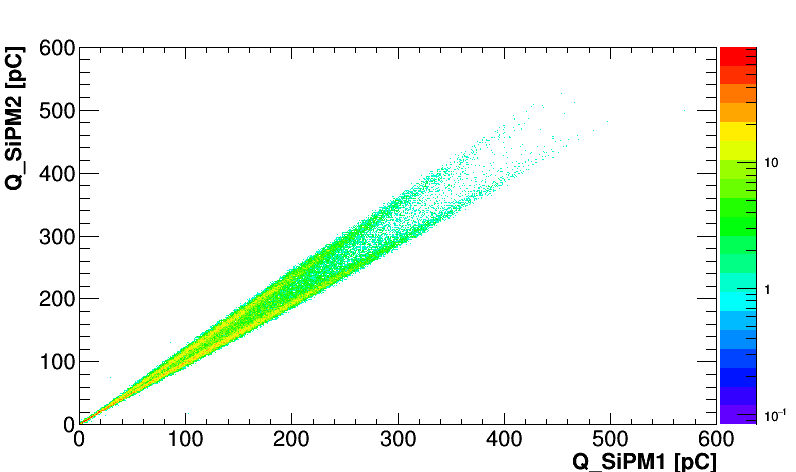

In [9]:
tre.Draw("charge[0]:charge[1]>>hh(600,0,600,600,0,600)", fidLarge, "goff")
hh = gDirectory.Get("hh")
_, cc = NewCanvas()
cc.SetLogz(1)
hh.SetStats(0)
hh.SetTitle(run)
hh.GetXaxis().SetTitle("Q_SiPM1 [pC]")
hh.GetYaxis().SetTitle("Q_SiPM2 [pC]")
hh.Draw("zcol")
cc.SaveAs(out + "q1_q2" + exten)

Info in <TCanvas::Print>: pdf file out/run530164/dt_asym.pdf has been created


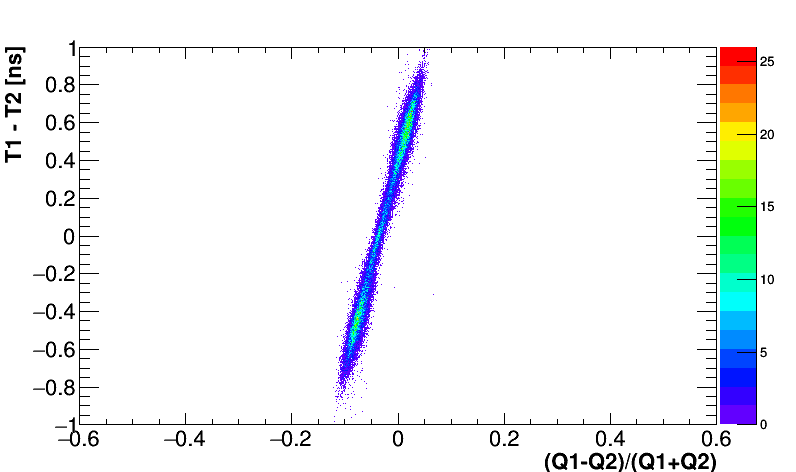

In [10]:
tre.Draw(F"tim[0]-tim[1]:{asymSipm}>>hh(1000, -0.6, 0.6, 1000, -1, 1)", fidLarge + " && " + cCutSipm, "goff")
hh = gDirectory.Get("hh")
_, cc = NewCanvas()
cc.SetLogz(0)
hh.SetStats(0)
hh.SetTitle(run)
hh.GetXaxis().SetTitle("(Q1-Q2)/(Q1+Q2)")
hh.GetYaxis().SetTitle("T1 - T2 [ns]")
hh.Draw("zcol")
cc.SaveAs(out + "dt_asym" + exten)

Info in <TCanvas::Print>: pdf file out/run530164/t1_q1.pdf has been created


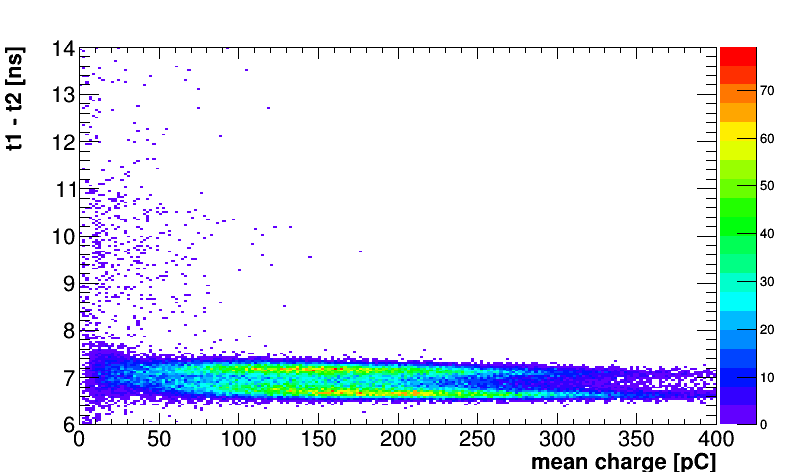

In [11]:
tre.Draw(F"tim[0]-{mtMcp}:charge[0]>>hhh(200, 0, 400, 200, 6, 14)", fidLarge, "goff")
# tre.Draw(F"digiTime[11]-digiTime[12]:0.5*(digiPh[11]+digiPh[12])>>hhh(200, 0, 3000, 20, -100, 100)", "digiPh[11] > 20 && digiPh[12] > 20", "goff")
hhh = gDirectory.Get("hhh")
_, ccc = NewCanvas()
ccc.SetLogz(0)
hhh.SetStats(0)
hhh.SetTitle(run)
hhh.GetXaxis().SetTitle("mean charge [pC]")
hhh.GetYaxis().SetTitle("t1 - t2 [ns]")
hhh.Draw("zcol")
ccc.SaveAs(out + "t1_q1" + exten)
# hhh.SaveAs("ciao.root")

Info in <TCanvas::Print>: pdf file out/run530164/dt_mc.pdf has been created


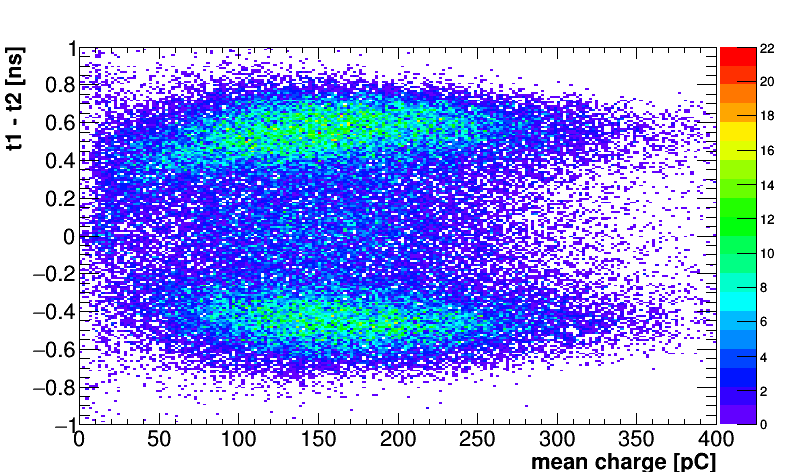

In [12]:
thisCut = fidLarge
tre.Draw(F"tim[0]-tim[1]:0.5*charge[1]+0.5*charge[0]>>hhh(200, 0, 400, 200, -1, 1)", thisCut, "goff")
# tre.Draw(F"digiTime[11]-digiTime[12]:0.5*(digiPh[11]+digiPh[12])>>hhh(200, 0, 3000, 20, -100, 100)", "digiPh[11] > 20 && digiPh[12] > 20", "goff")
hhh = gDirectory.Get("hhh")
_, ccc = NewCanvas()
ccc.SetLogz(0)
hhh.SetStats(0)
hhh.SetTitle(run)
hhh.GetXaxis().SetTitle("mean charge [pC]")
hhh.GetYaxis().SetTitle("t1 - t2 [ns]")
hhh.Draw("zcol")
ccc.SaveAs(out + "dt_mc" + exten)
# ccc.SaveAs("prova.root")

Info in <TCanvas::Print>: pdf file out/run530164/fiducial.pdf has been created


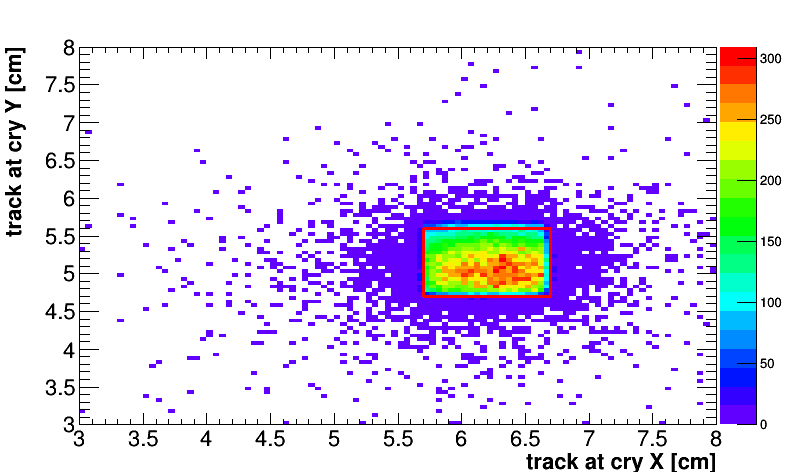

In [13]:
tre.Draw(F"cryPos[1]:cryPos[0]>>hh(100, 3, 8, 100, 3, 8)", cCutSipm, "goff")
hh = gDirectory.Get("hh")
_, cc = NewCanvas()
cc.SetLogz(0)
hh.SetStats(0)
hh.SetTitle(run)
hh.GetXaxis().SetTitle("track at cry X [cm]")
hh.GetYaxis().SetTitle("track at cry Y [cm]")
box = TBox(fidlarge[0], fidlarge[2], fidlarge[1], fidlarge[3])
box.SetLineColor(kRed)
box.SetLineWidth(3)
box.SetFillStyle(0)
hh.Draw("zcol")
box.Draw("same")
cc.SaveAs(out + "fiducial" + exten)

Info in <TCanvas::Print>: pdf file out/run530164/asym_posX.pdf has been created
Info in <TCanvas::Print>: pdf file out/run530164/asym_posY.pdf has been created


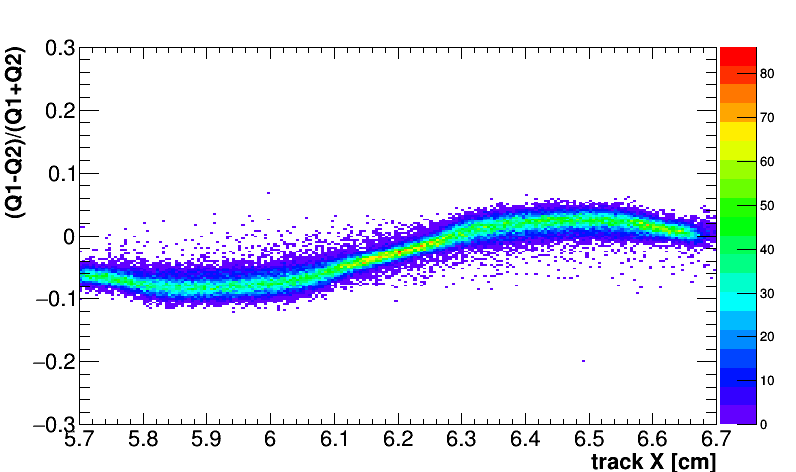

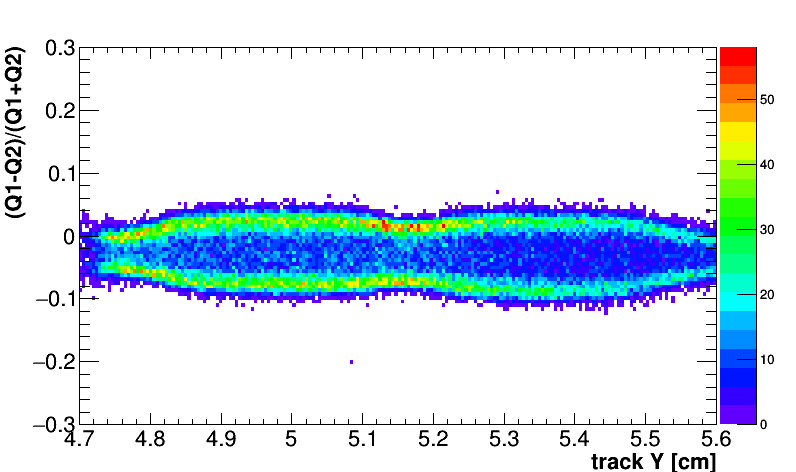

In [14]:
tre.Draw(F"{asymSipm}:cryPos[0]>>hh(200, {fidlarge[0]},{fidlarge[1]}, 200, -.3, .3)", fidLarge + cutAnd + cCutSipm, "goff")
hh = gDirectory.Get("hh")
_, cc = NewCanvas()
cc.SetLogz(0)
hh.SetStats(0)
hh.SetTitle(run)
hh.GetXaxis().SetTitle("track X [cm]")
hh.GetYaxis().SetTitle("(Q1-Q2)/(Q1+Q2)")
hh.Draw("zcol")
cc.SaveAs(out + "asym_posX" + exten)

tre.Draw(F"{asymSipm}:cryPos[1]>>hhh(200, {fidlarge[2]},{fidlarge[3]}, 100, -.3, .3)", fidLarge + cutAnd + cCutSipm, "goff")
hhh = gDirectory.Get("hhh")
_, ccc = NewCanvas()
ccc.SetLogz(0)
hhh.SetStats(0)
hhh.SetTitle(run)
hhh.GetXaxis().SetTitle("track Y [cm]")
hhh.GetYaxis().SetTitle("(Q1-Q2)/(Q1+Q2)")
hhh.Draw("zcol")
ccc.SaveAs(out + "asym_posY" + exten)

Error in <TSelectorDraw::Begin>: Two open or close brackets found, hname=hh(200,5.7,6.7,200,4.7,(5.6, 200, -1, 1)
Info in <TH3F::SaveAs>: ROOT file th3.root has been created


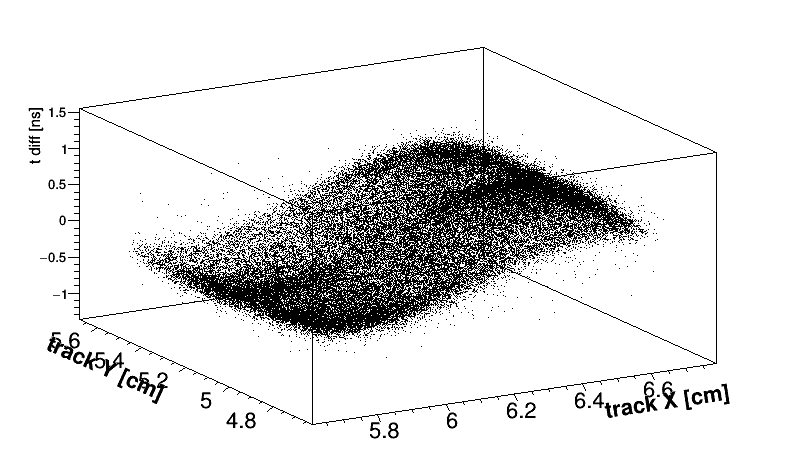

In [50]:
tre.Draw(F"(tim[0]-tim[1]):cryPos[1]:cryPos[0]>>hh(200,{fidlarge[0]},{fidlarge[1]},200,{fidlarge[2]},{fidlarge[3],200,-1,1}", F"({fidLarge + cutAnd + cCutSipm})", "goff")
hh = gDirectory.Get("hh")
_, cc = NewCanvas()
# cc.SetLogz(0)
hh.SetStats(0)
hh.SetTitle(run)
hh.GetXaxis().SetTitle("track X [cm]")
hh.GetYaxis().SetTitle("track Y [cm]")
hh.GetZaxis().SetTitle("t diff [ns]")
hh.Draw("zcol")
hh.SaveAs("th3.root")
# cc.SaveAs(out + "dt_posX" + exten)

Info in <TCanvas::Print>: pdf file out/run530164/dt_posX.pdf has been created
Info in <TCanvas::Print>: pdf file out/run530164/dt_posY.pdf has been created


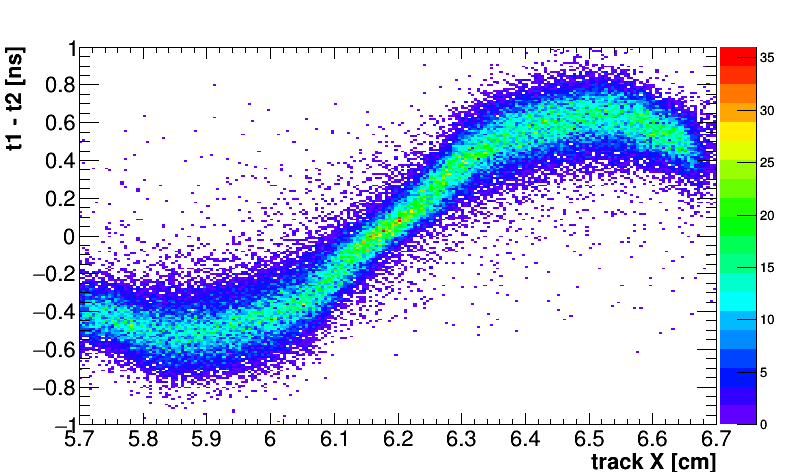

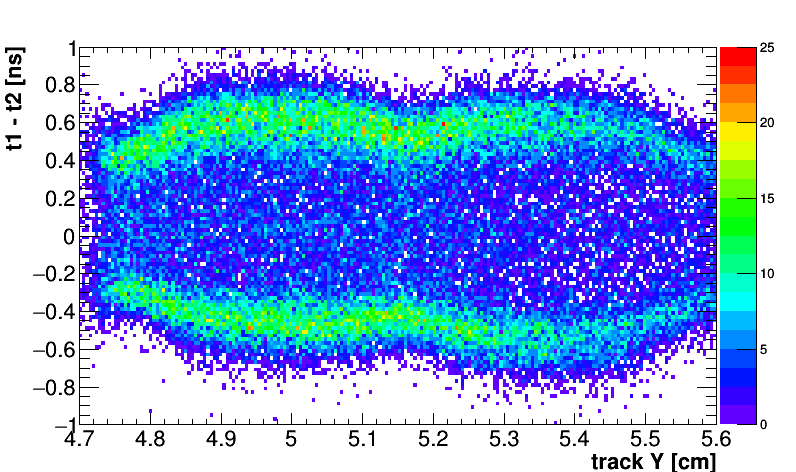

In [15]:
tre.Draw(F"tim[0]-tim[1]:cryPos[0]>>hh(200, {fidlarge[0]},{fidlarge[1]}, 200, -1, 1)", fidLarge + cutAnd + cCutSipm, "goff")
hh = gDirectory.Get("hh")
_, cc = NewCanvas()
cc.SetLogz(0)
hh.SetStats(0)
hh.SetTitle(run)
hh.GetXaxis().SetTitle("track X [cm]")
hh.GetYaxis().SetTitle("t1 - t2 [ns]")
hh.Draw("zcol")
cc.SaveAs(out + "dt_posX" + exten)

tre.Draw(F"tim[0]-tim[1]:cryPos[1]>>hhh(200, {fidlarge[2]},{fidlarge[3]}, 100, -1, 1)", fidLarge + cutAnd + cCutSipm, "goff")
hhh = gDirectory.Get("hhh")
_, ccc = NewCanvas()
ccc.SetLogz(0)
hhh.SetStats(0)
hhh.SetTitle(run)
hhh.GetXaxis().SetTitle("track Y [cm]")
hhh.GetYaxis().SetTitle("t1 - t2 [ns]")
hhh.Draw("zcol")
ccc.SaveAs(out + "dt_posY" + exten)